In [1]:
import pandas as pd

# 1. load data

In [2]:
iris_data = pd.read_csv('./data/iris.csv')

In [3]:
iris_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


# 2. Divide by species

In [4]:
species = list(set(iris_data['species']))
print "species:",species

species: ['setosa', 'versicolor', 'virginica']


In [5]:
iris_0 = iris_data.loc[iris_data.species==species[0]]
iris_1 = iris_data.loc[iris_data.species==species[1]]
iris_2 = iris_data.loc[iris_data.species==species[2]]

# 3. Plot data

In [6]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
columns = list(iris_data.columns.values)
features = columns[:-1]
features

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

x axis: sepal_length 
y axis: sepal_width


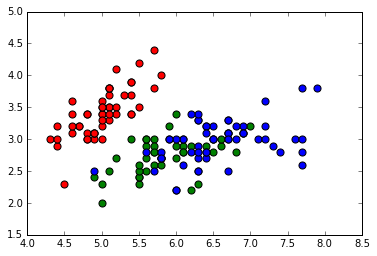

x axis: sepal_width 
y axis: petal_length


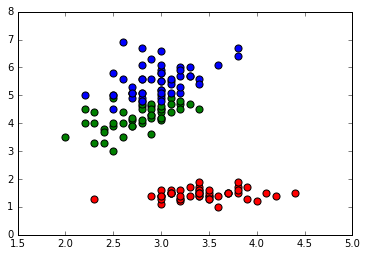

x axis: petal_length 
y axis: petal_width


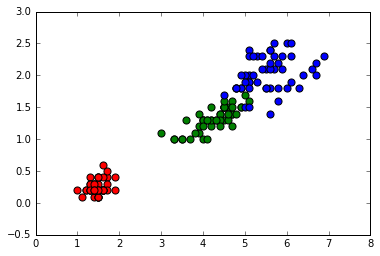

In [8]:
for i in range(0,3):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    print "x axis:",features[i],"\ny axis:",features[i+1]
    type1 = ax.scatter(iris_0[features[i]], iris_0[features[i+1]], s=50, c='red')
    type2 = ax.scatter(iris_1[features[i]], iris_1[features[i+1]], s=50, c='green')
    type3 = ax.scatter(iris_2[features[i]], iris_2[features[i+1]], s=50, c='blue')

    plt.show()


# 4. Make Decision Tree Model
## 4.1 train set, test set
* random sampling (8:2)

In [9]:
train=iris_data.sample(frac=0.8,random_state=200)
test=iris_data.drop(train.index)

In [10]:
train_X = train[train.columns[0:4]]
train_Y = train['species']

test_X = test[test.columns[0:4]]
test_Y = test['species']

## 4.2 Learning with Decision Tree Model

In [11]:
from sklearn import tree
from sklearn import metrics

In [12]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_X, train_Y)

In [13]:
print "Model Accuracy: %f" % (100*clf.score(test_X,test_Y))

Model Accuracy: 90.000000


In [14]:
pred_y = clf.predict(test_X)
prf = metrics.precision_recall_fscore_support(test_Y,pred_y)
print "Confusion Matrix:", prf

Confusion Matrix: (array([ 1.        ,  0.81818182,  0.90909091]), array([ 1.        ,  0.9       ,  0.83333333]), array([ 1.        ,  0.85714286,  0.86956522]), array([ 8, 10, 12]))


## 4.3 Graphical tree
### download graphviz 
* pip install graphviz
* brew install graphviz

In [15]:
import graphviz

In [19]:
tree.export_graphviz(clf, out_file="decisiontree.dot")
with open("decisiontree.dot") as f:
    dot_graph = f.read()
graph = graphviz.Source(dot_graph)
graph.render("iris")

'iris.pdf'

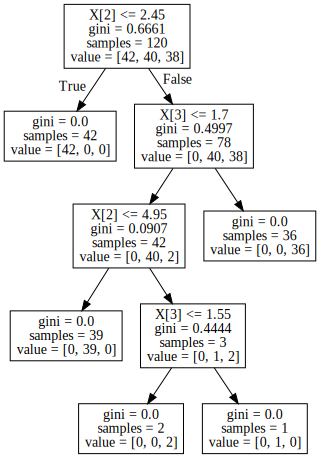

In [20]:
graph